# Simulating logic gates using `crysx_nn`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define some network parameters that we will be using toninitialize the model

In [2]:
nInputs = 2 # No. of nodes in the input layer
neurons_per_layer = [3, 1] # Neurons per layer (excluding the input layer)
activation_func_names = ['Tanh_offset', 'Tanh_offset']
nLayers = len(neurons_per_layer)
nEpochs=10**4
batchSize = 4 # No. of input samples to process at a time for optimization

## Create the neural network model

In [3]:
from crysx_nn import network
model = network.nn_model(nInputs=nInputs, neurons_per_layer=neurons_per_layer, activation_func_names=activation_func_names, batch_size=batchSize, device='CPU', init_method='Xavier') 

C:\Users\manas\anaconda3\envs\crysx_nn\lib\site-packages\crysx_nn\network.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Note: The model will use the following device for all the computations:  CPU


## Check the details of the model for confirmation

In [4]:
model.details()

----------------------------------------------------------------------------------
****Neural Network Model Details****
----------------------------------------------------------------------------------
Number of input nodes:  2
Number of layers (hidden+output):  2
Number of nodes in each layer (hidden & output):  [3, 1]
Activation function for each layer (hidden & output):   ['Tanh_offset', 'Tanh_offset']
Method used for weights and biases initialization:   Xavier
Batch Size:  4
Device:  CPU
Optimization method:  SGD
Learning rate:  0.5
----------------------------------------------------------------------------------


## Visualize the network

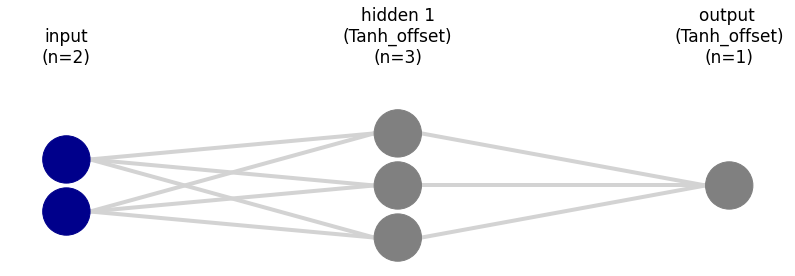

In [5]:
model.visualize()

## Initial Weights and Biases being used by the network

In [6]:
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 0.69220674, -0.61255179],
       [ 0.6111291 ,  0.15045302],
       [ 0.70524644,  0.49123389]]), array([[-0.55672354,  0.32480731, -0.26968002]])]
Initial Biases:
 [array([0., 0., 0.]), array([0.])]


## Set the inputs (rows correspond to different set of inputs and columns represent the inputs)

In [7]:
inputs = np.array([[0.,0.,1.,1.],[0.,1.,0.,1.]]).T.astype('float32')
print(inputs)
print(inputs.dtype)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
float32


## Outputs for different logic gates

In [8]:
# AND function
outputAND = np.array([0.,0.,0.,1.])
outputAND = np.asarray([outputAND]).T
# OR function
outputOR = np.array([0.,1.,1.,1.])
outputOR = np.asarray([outputOR]).T
# NAND function
outputNAND = np.array([1.,1.,1.,0.])
outputNAND = np.asarray([outputNAND]).T
# XOR function
outputXOR = np.array([0.,1.,1.,0.])
outputXOR = np.asarray([outputXOR]).T

In [9]:
print('AND outputs\n', outputAND)
print('OR outputs\n', outputOR)
print('XOR outputs\n', outputXOR)
print('NAND outputs\n', outputNAND)

AND outputs
 [[0.]
 [0.]
 [0.]
 [1.]]
OR outputs
 [[0.]
 [1.]
 [1.]
 [1.]]
XOR outputs
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND outputs
 [[1.]
 [1.]
 [1.]
 [0.]]


## You can also reinitialize weights and biases using some other method

In [10]:
model.init_params(method='NormXavier')
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-0.66735507,  1.89981375],
       [ 1.58135381,  0.30297808],
       [-1.02875636,  0.39637066]]), array([[ 1.14150595,  0.86579216, -1.50878406]])]
Initial Biases:
 [array([0., 0., 0.]), array([0.])]


## You can also define your own custom initial guess and weights

For example, for a neural network with 2 nodes in input layer, 3 nodes in hidden layer and 1 node in output layer use the following commented code

In [11]:
# # Initial guesses for weights
# w1 = 0.30
# w2 = 0.55
# w3 = 0.20
# w4 = 0.45
# w5 = 0.50
# w6 = 0.35
# w7 = 0.15
# w8 = 0.40
# w9 = 0.25

# # Initial guesses for biases
# b1 = 0.60
# b2 = 0.05

# # need to use a list instead of a numpy array, since the 
# #weight matrices at each layer are not of the same dimensions
# weights = [] 
# # Weights for layer 1 --> 2
# weights.append(np.array([[w1,w4],[w2, w5], [w3, w6]]))
# # Weights for layer 2 --> 3
# weights.append(np.array([[w7, w8, w9]]))
# # List of biases at each layer
# biases = []
# biases.append(np.array([b1,b1,b1]))
# biases.append(np.array([b2]))

# weightsOriginal = weights
# biasesOriginal = biases

# print('Weights matrices: ',weights)
# print('Biases: ',biases)

## Train neural network for AND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [12]:

# Run optimization
model.optimize(inputs, outputAND, lr=0.5,nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.43383708725030273


### Visualize the training loss

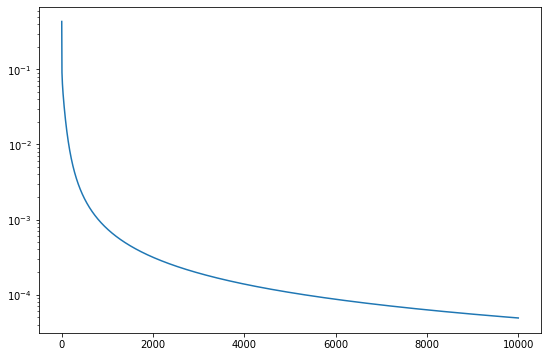

In [13]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [14]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[-0.77234777,  2.94809178],
       [ 1.97016642, -0.00716646],
       [-1.99009021, -1.28229001]]), array([[ 2.82829401,  1.79432844, -4.51437819]])]
Optimized Biases:  [array([-0.40955495, -0.86377195,  2.29951601]), array([-1.48587213])]


### Make predictions using the optimized weights

In [15]:
predictions, error = model.predict(inputs, outputAND, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputAND)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[6.51744058e-05]
 [8.16272136e-03]
 [5.94678339e-03]
 [9.90297134e-01]]
Expected Output:
 [[0.]
 [0.]
 [0.]
 [1.]]
New Average Error with optimized weights:
 4.903602650103742e-05


## Train neural network for NAND gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [16]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 0.50378642,  0.39349568],
       [ 0.14564292,  0.57876518],
       [-0.03805383, -0.57339065]]), array([[ 0.44961986, -0.20733947, -0.5298311 ]])]
Initial Biases:
 [array([0., 0., 0.]), array([0.])]


In [17]:

# Run optimization
model.optimize(inputs, outputNAND, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.2845484501936699


### Visualize the training loss

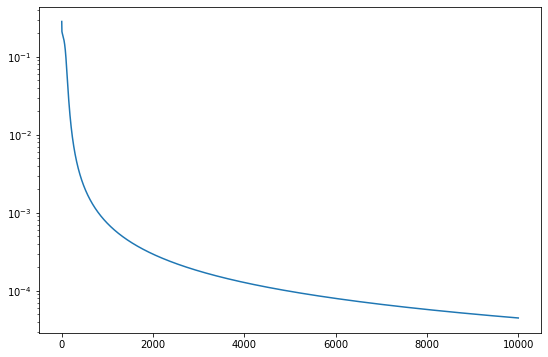

In [18]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [19]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[ 0.30359807,  0.30298973],
       [ 2.0312073 ,  1.94369894],
       [-1.06903772, -1.16949897]]), array([[ 0.11924679, -4.67280626,  2.60902355]])]
Optimized Biases:  [array([ 0.57939218, -2.884604  ,  1.52850932]), array([1.24822638])]


### Make predictions using the optimized weights

In [20]:
predictions, error = model.predict(inputs, outputNAND, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputNAND)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.99951582]
 [0.99311968]
 [0.99327259]
 [0.00931587]]
Expected Output:
 [[1.]
 [1.]
 [1.]
 [0.]]
New Average Error with optimized weights:
 4.490416651383831e-05


## Train neural network for OR gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [21]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-0.04326879,  0.01809289],
       [-0.6557164 ,  0.6316589 ],
       [ 0.46775561, -0.69215264]]), array([[ 0.36981482, -0.14274204,  0.18608233]])]
Initial Biases:
 [array([0., 0., 0.]), array([0.])]


In [16]:

# Run optimization
model.optimize(inputs, outputOR, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.49299428365363374


### Visualize the training loss

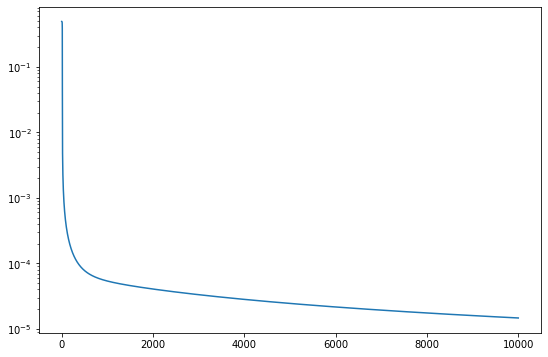

In [17]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [18]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[-0.14286939,  2.95968323],
       [ 2.12429001,  0.32386454],
       [-2.67455997, -1.94564985]]), array([[ 3.27544165,  2.46529888, -4.39303815]])]
Optimized Biases:  [array([-0.14378777, -0.58627569,  1.12318504]), array([-0.63531316])]


### Make predictions using the optimized weights

In [19]:
predictions, error = model.predict(inputs, outputOR, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputOR)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.0052569 ]
 [0.99655766]
 [0.99561933]
 [0.99995705]]
Expected Output:
 [[0.]
 [1.]
 [1.]
 [1.]]
New Average Error with optimized weights:
 1.466920984474935e-05


## Train neural network for XOR gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [27]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-0.17229731, -0.16854108],
       [-0.29442495,  0.07447955],
       [ 0.19708903, -0.56571714]]), array([[ 0.54165675, -0.15567231, -0.56125877]])]
Initial Biases:
 [array([0., 0., 0.]), array([0.])]


In [28]:

# Run optimization
model.optimize(inputs, outputXOR, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.25384613312308213


### Visualize the training loss

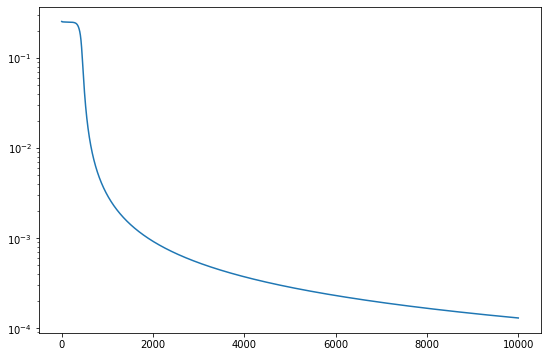

In [29]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [30]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[ 2.93699173, -3.00486239],
       [-0.38103507,  0.20153069],
       [ 3.22585341, -3.18667768]]), array([[ 5.25995341,  0.42991524, -4.97061278]])]
Optimized Biases:  [array([-1.57757752,  0.08901089,  1.64398716]), array([2.12724186])]


### Make predictions using the optimized weights

In [31]:
predictions, error = model.predict(inputs, outputXOR, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputXOR)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.01176525]
 [0.98753681]
 [0.98891142]
 [0.01008634]]
Expected Output:
 [[0.]
 [1.]
 [1.]
 [0.]]
New Average Error with optimized weights:
 0.00012961076292238163
